# 문제 1
- https://leetcode.com/contest/weekly-contest-320/problems/number-of-unequal-triplets-in-array/

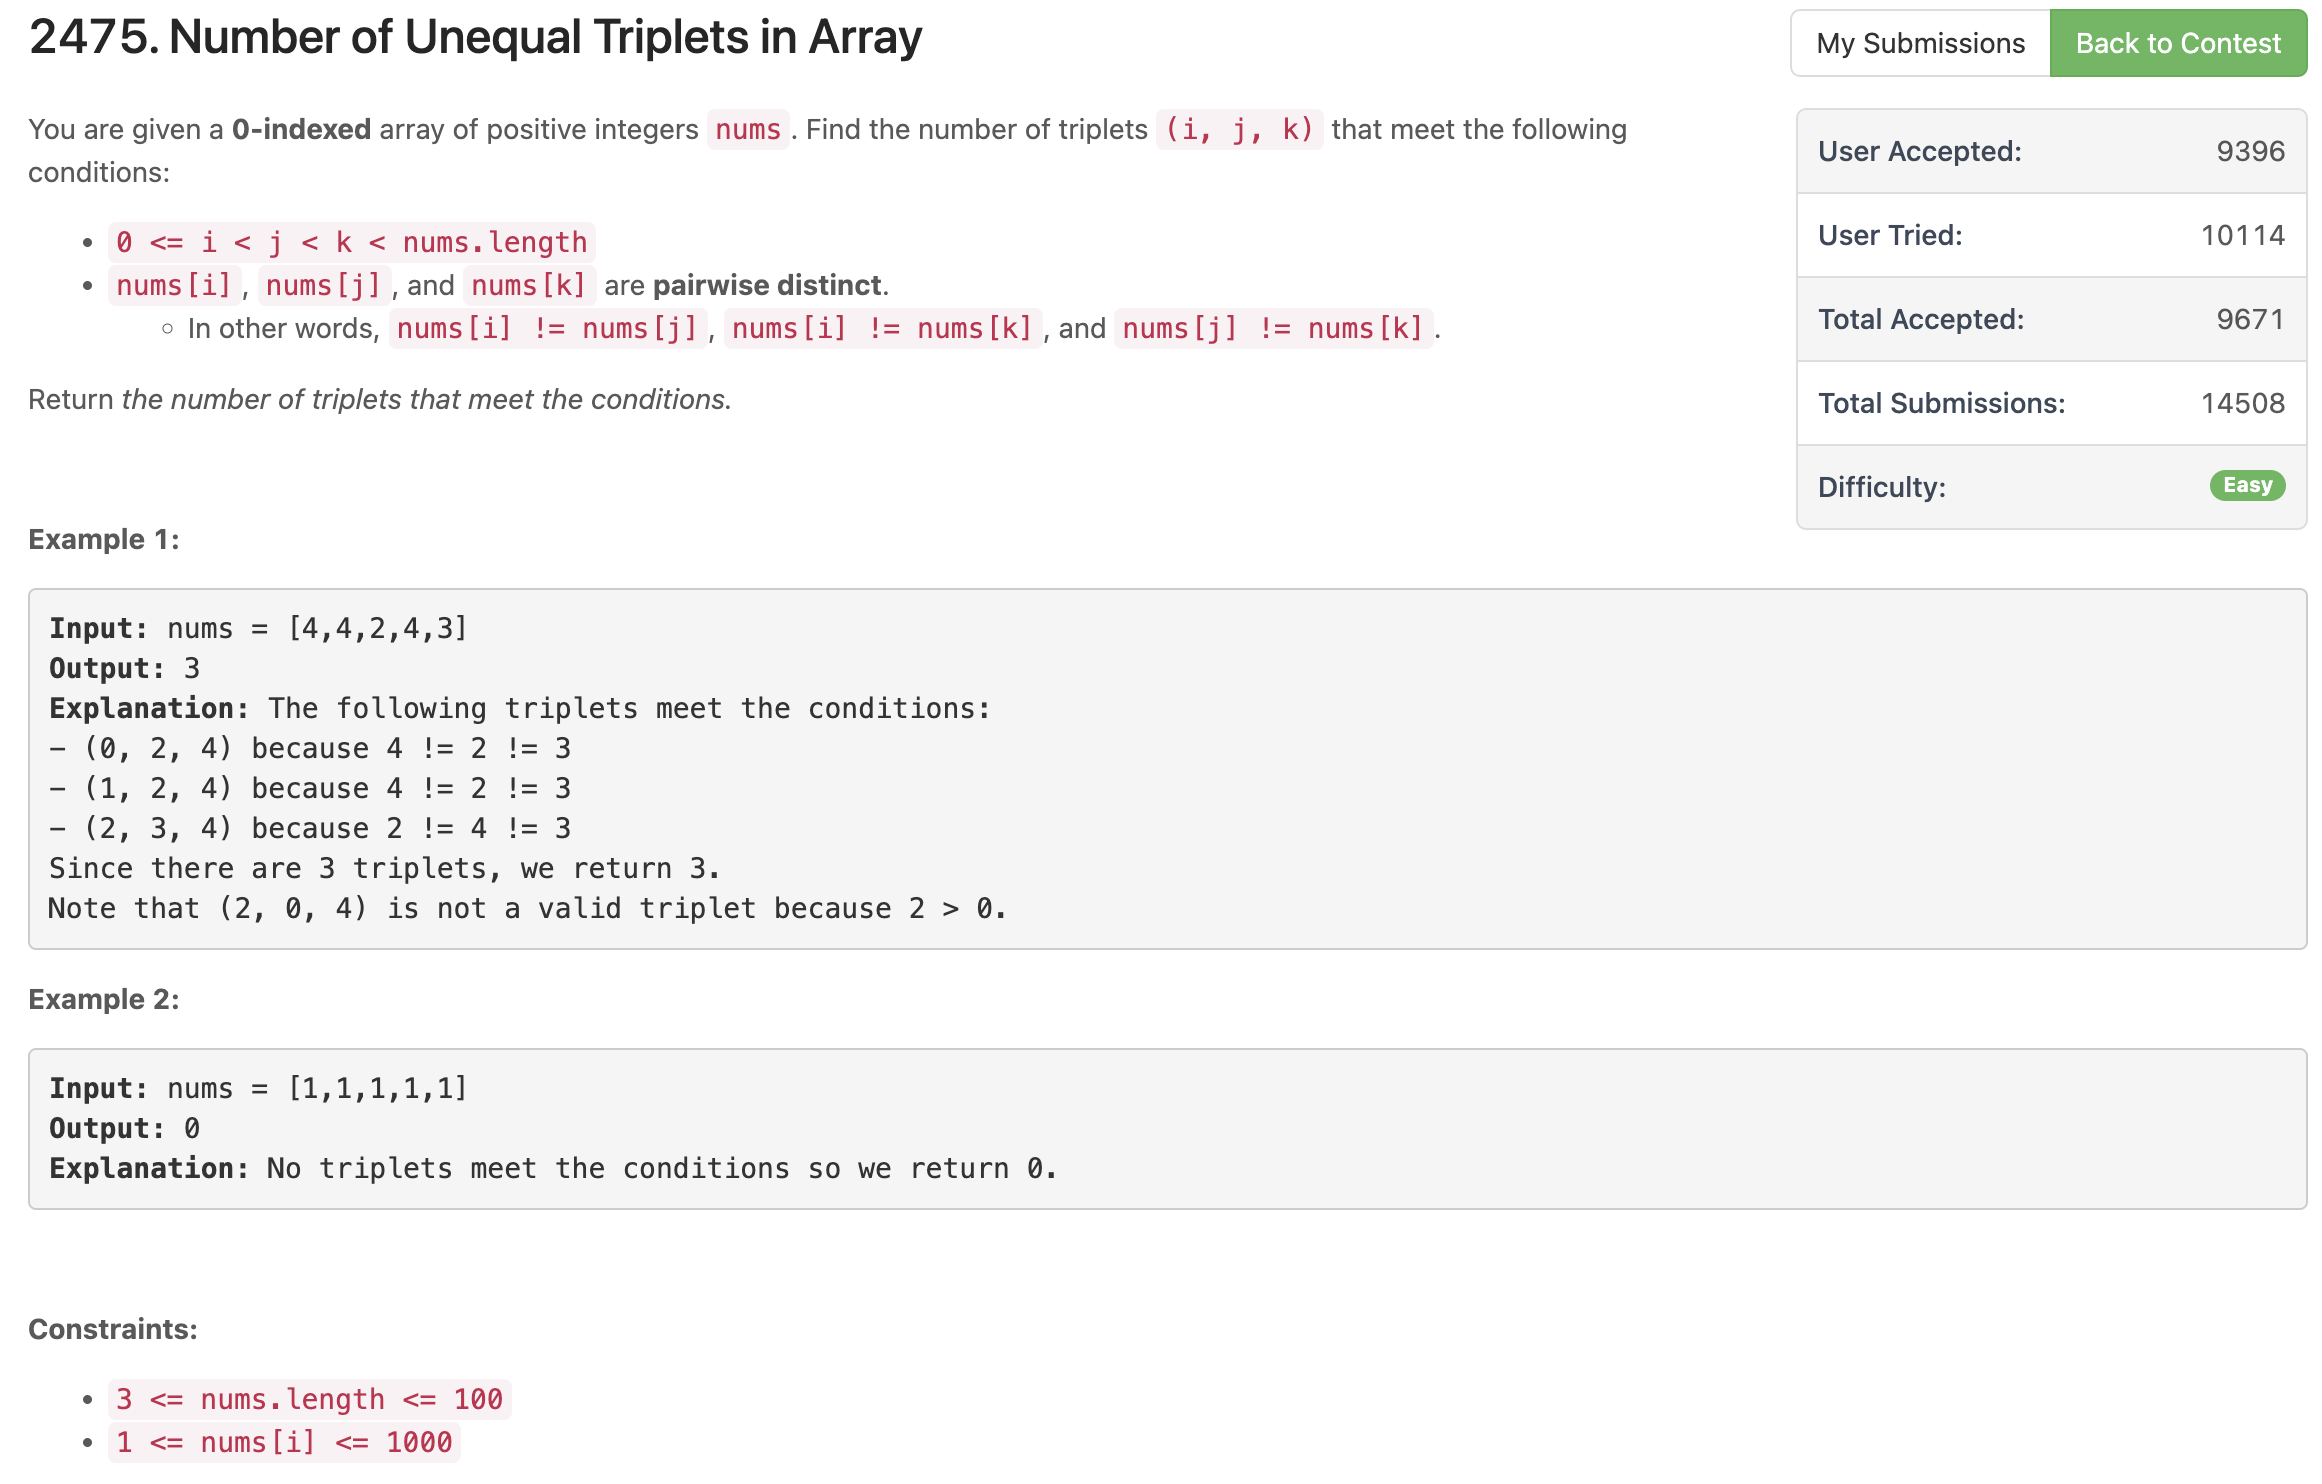

- 최대 길이가 100이니까 조합으로 풀 수 있을 듯

In [3]:
from itertools import combinations

class Solution:
    def unequalTriplets(self, nums: list[int]) -> int:
        n = len(nums)
        answer = 0
        for i,j,k in combinations(range(n),3):
            if len(set([nums[i],nums[j],nums[k]])) == 3:
                answer += 1
                
        return answer

# 문제 2
- https://leetcode.com/contest/weekly-contest-320/problems/closest-nodes-queries-in-a-binary-search-tree/

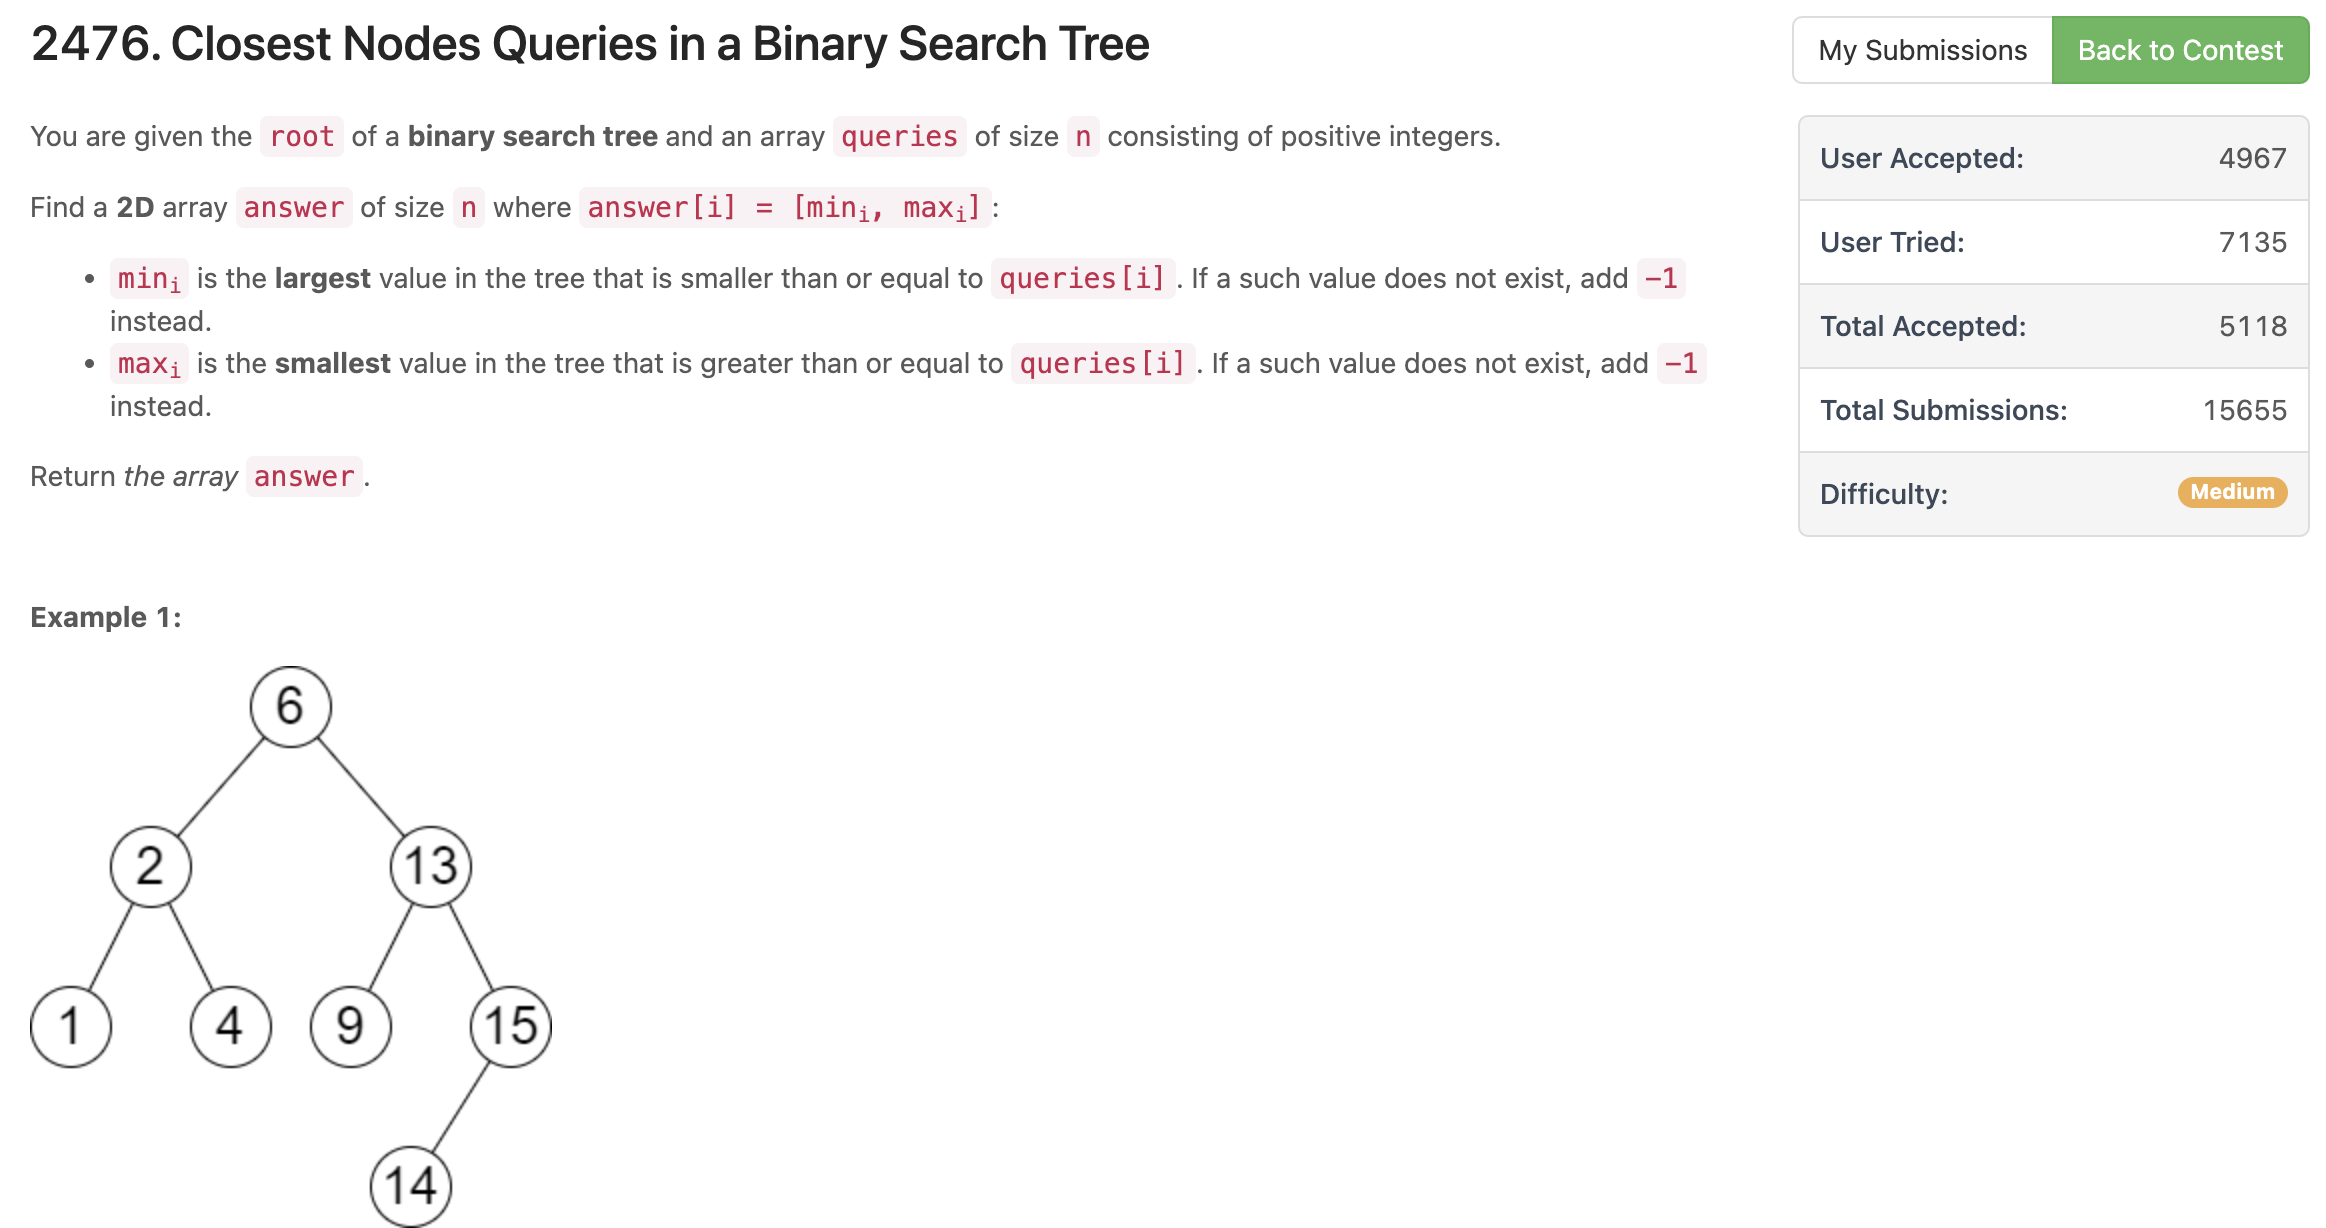
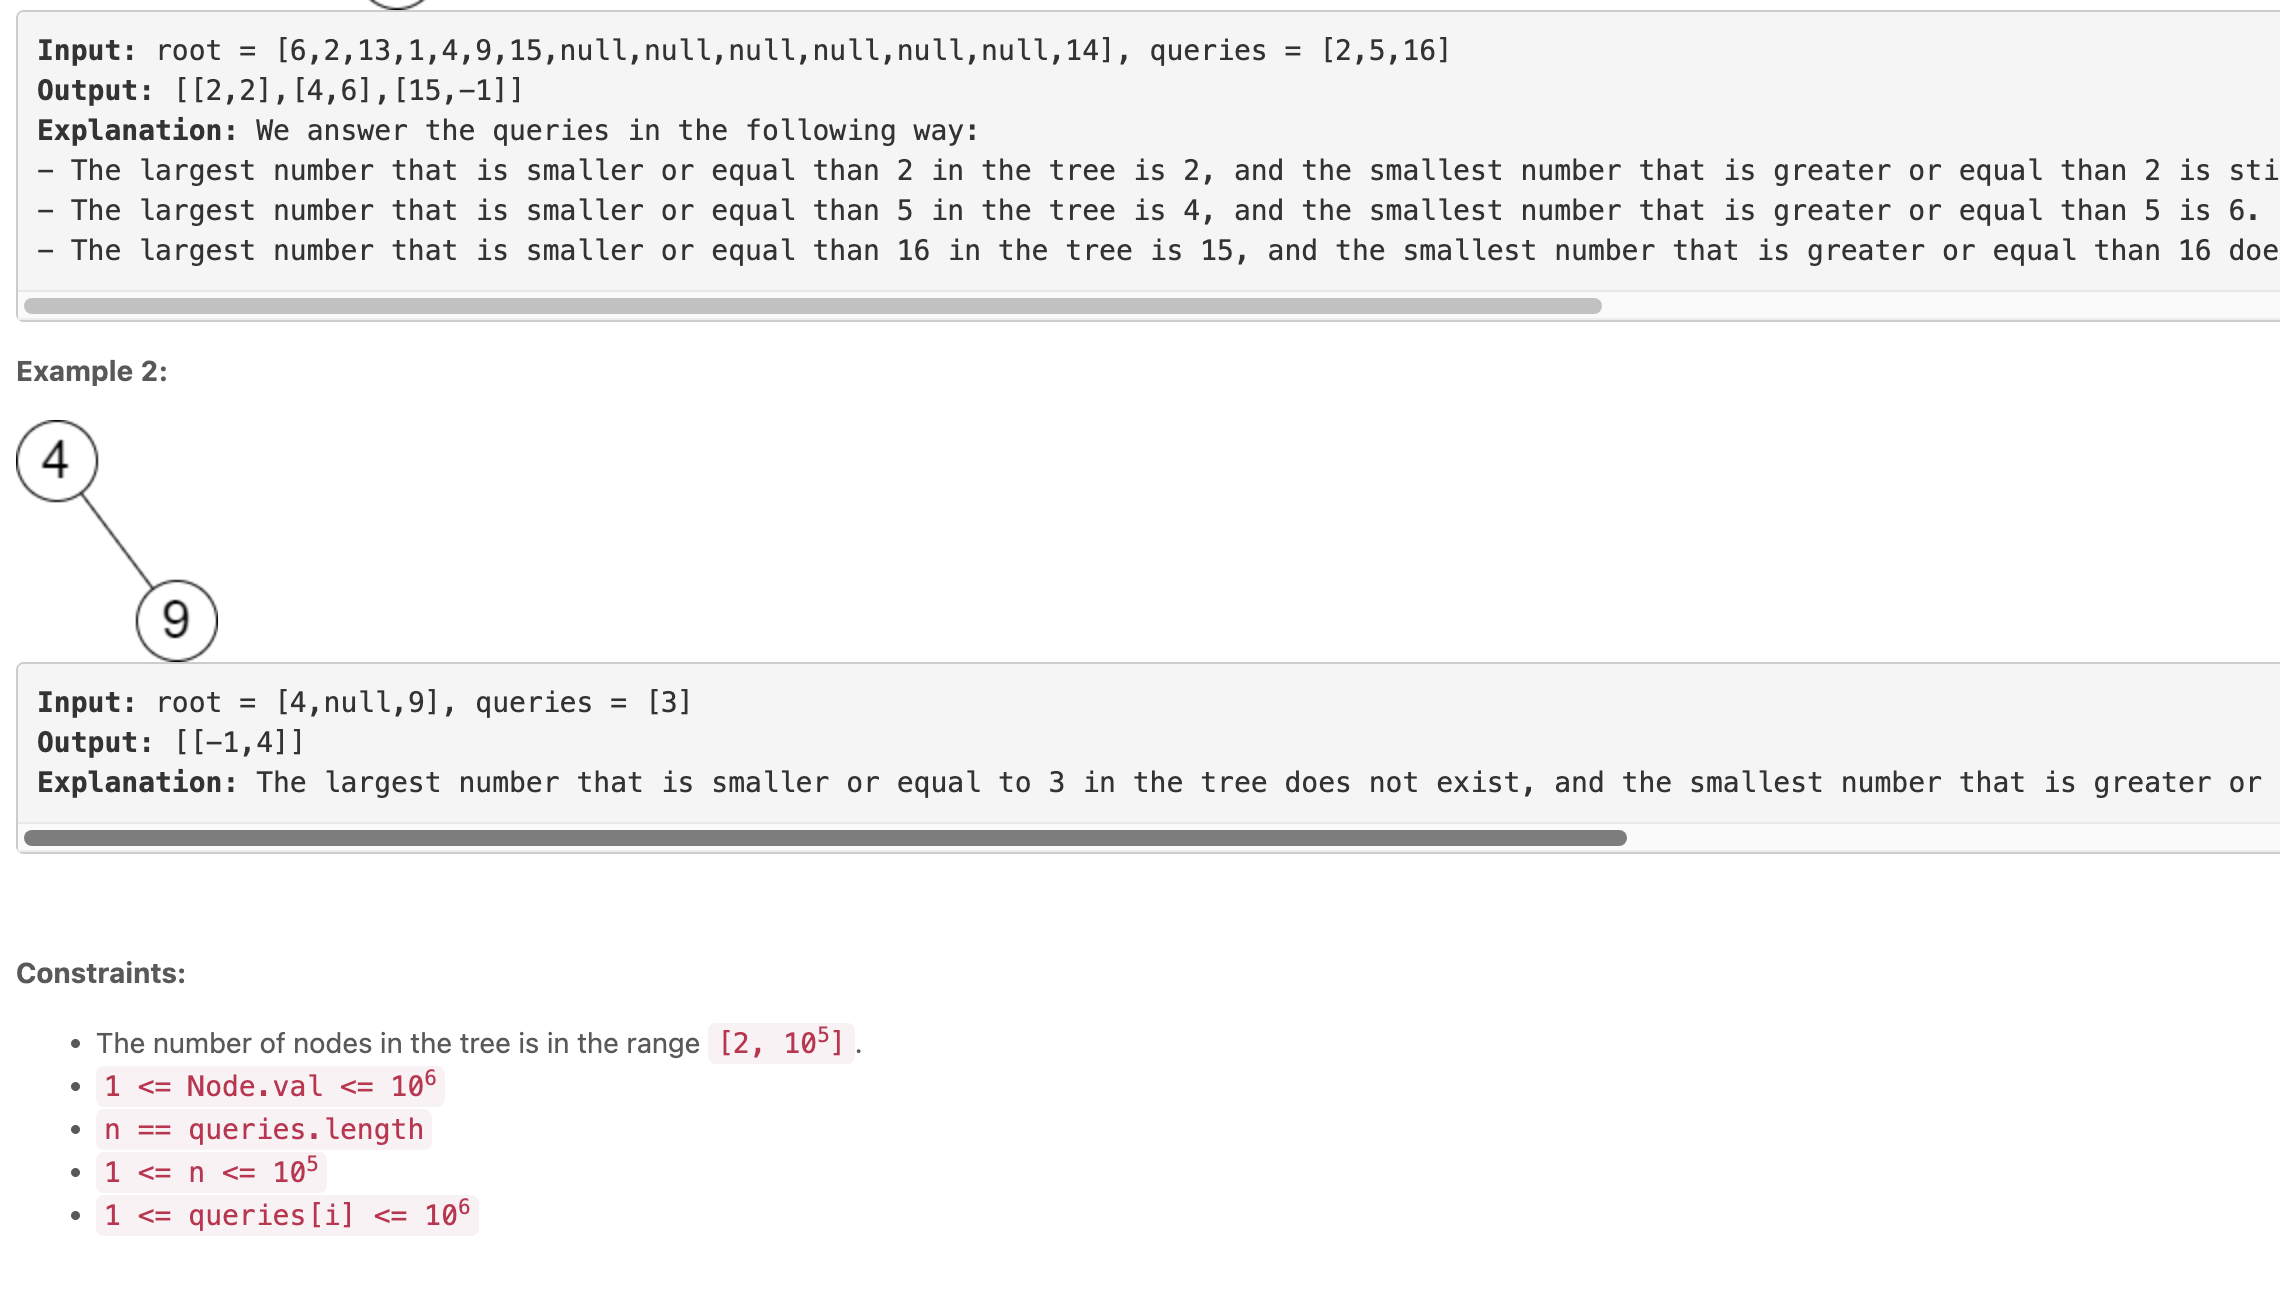

- 아이디어는 동일했으나, 이진 탐색 구현과정에서 막혔다
- 이진 탐색을 예외없이 잘 처리하는 연습을 해봐야할 것 같다
- https://leetcode.com/problems/closest-nodes-queries-in-a-binary-search-tree/solutions/2831726/binary-search-approach-python/

In [76]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right

from collections import deque
class Solution:
    def closestNodes(self, root: Optional[TreeNode], queries: List[int]) -> List[List[int]]:
        q = deque()
        q.append(root)
        nums = []
        while q:
            tree = q.popleft()
            val = tree.val
            if val:
                # print('val:',val)
                nums.append(val)
                
            if tree.left:
                q.append(tree.left)
            if tree.right:
                q.append(tree.right)
        # print(nums)        
        nums.sort()
        ans = []
        
        ## 이분탐색으로 빠르게 값 찾기 (left, right, mid 값 이용하여서)
        for target in queries:
            ### min_i, max_i값 동시에 찾기 (mid 인덱스를 찾고 거기서 두개를 동시에 찾는 느낌) ###
            left,right = 0,len(nums)-1
            min_tmp = -1
            while left <= right:
                mid = (left+right)//2
                if nums[mid] < target:
                    left = mid + 1
                elif nums[mid] > target:
                    right = mid - 1
                else:
                    min_tmp = nums[mid]
                    break
            if nums[mid] == target:
                ans.append([nums[mid], nums[mid]])
            elif nums[mid] > target:
                if (mid - 1) >= 0:
                    ans.append([nums[mid - 1], nums[mid]])
                else:
                    ans.append([-1, nums[mid]])
            else:
                if (mid + 1) < len(nums):
                    ans.append([nums[mid], nums[mid + 1]])
                else:
                    ans.append([nums[mid], -1])

        return ans
            

NameError: name 'Optional' is not defined

# 문제 3
- https://leetcode.com/contest/weekly-contest-320/problems/minimum-fuel-cost-to-report-to-the-capital/

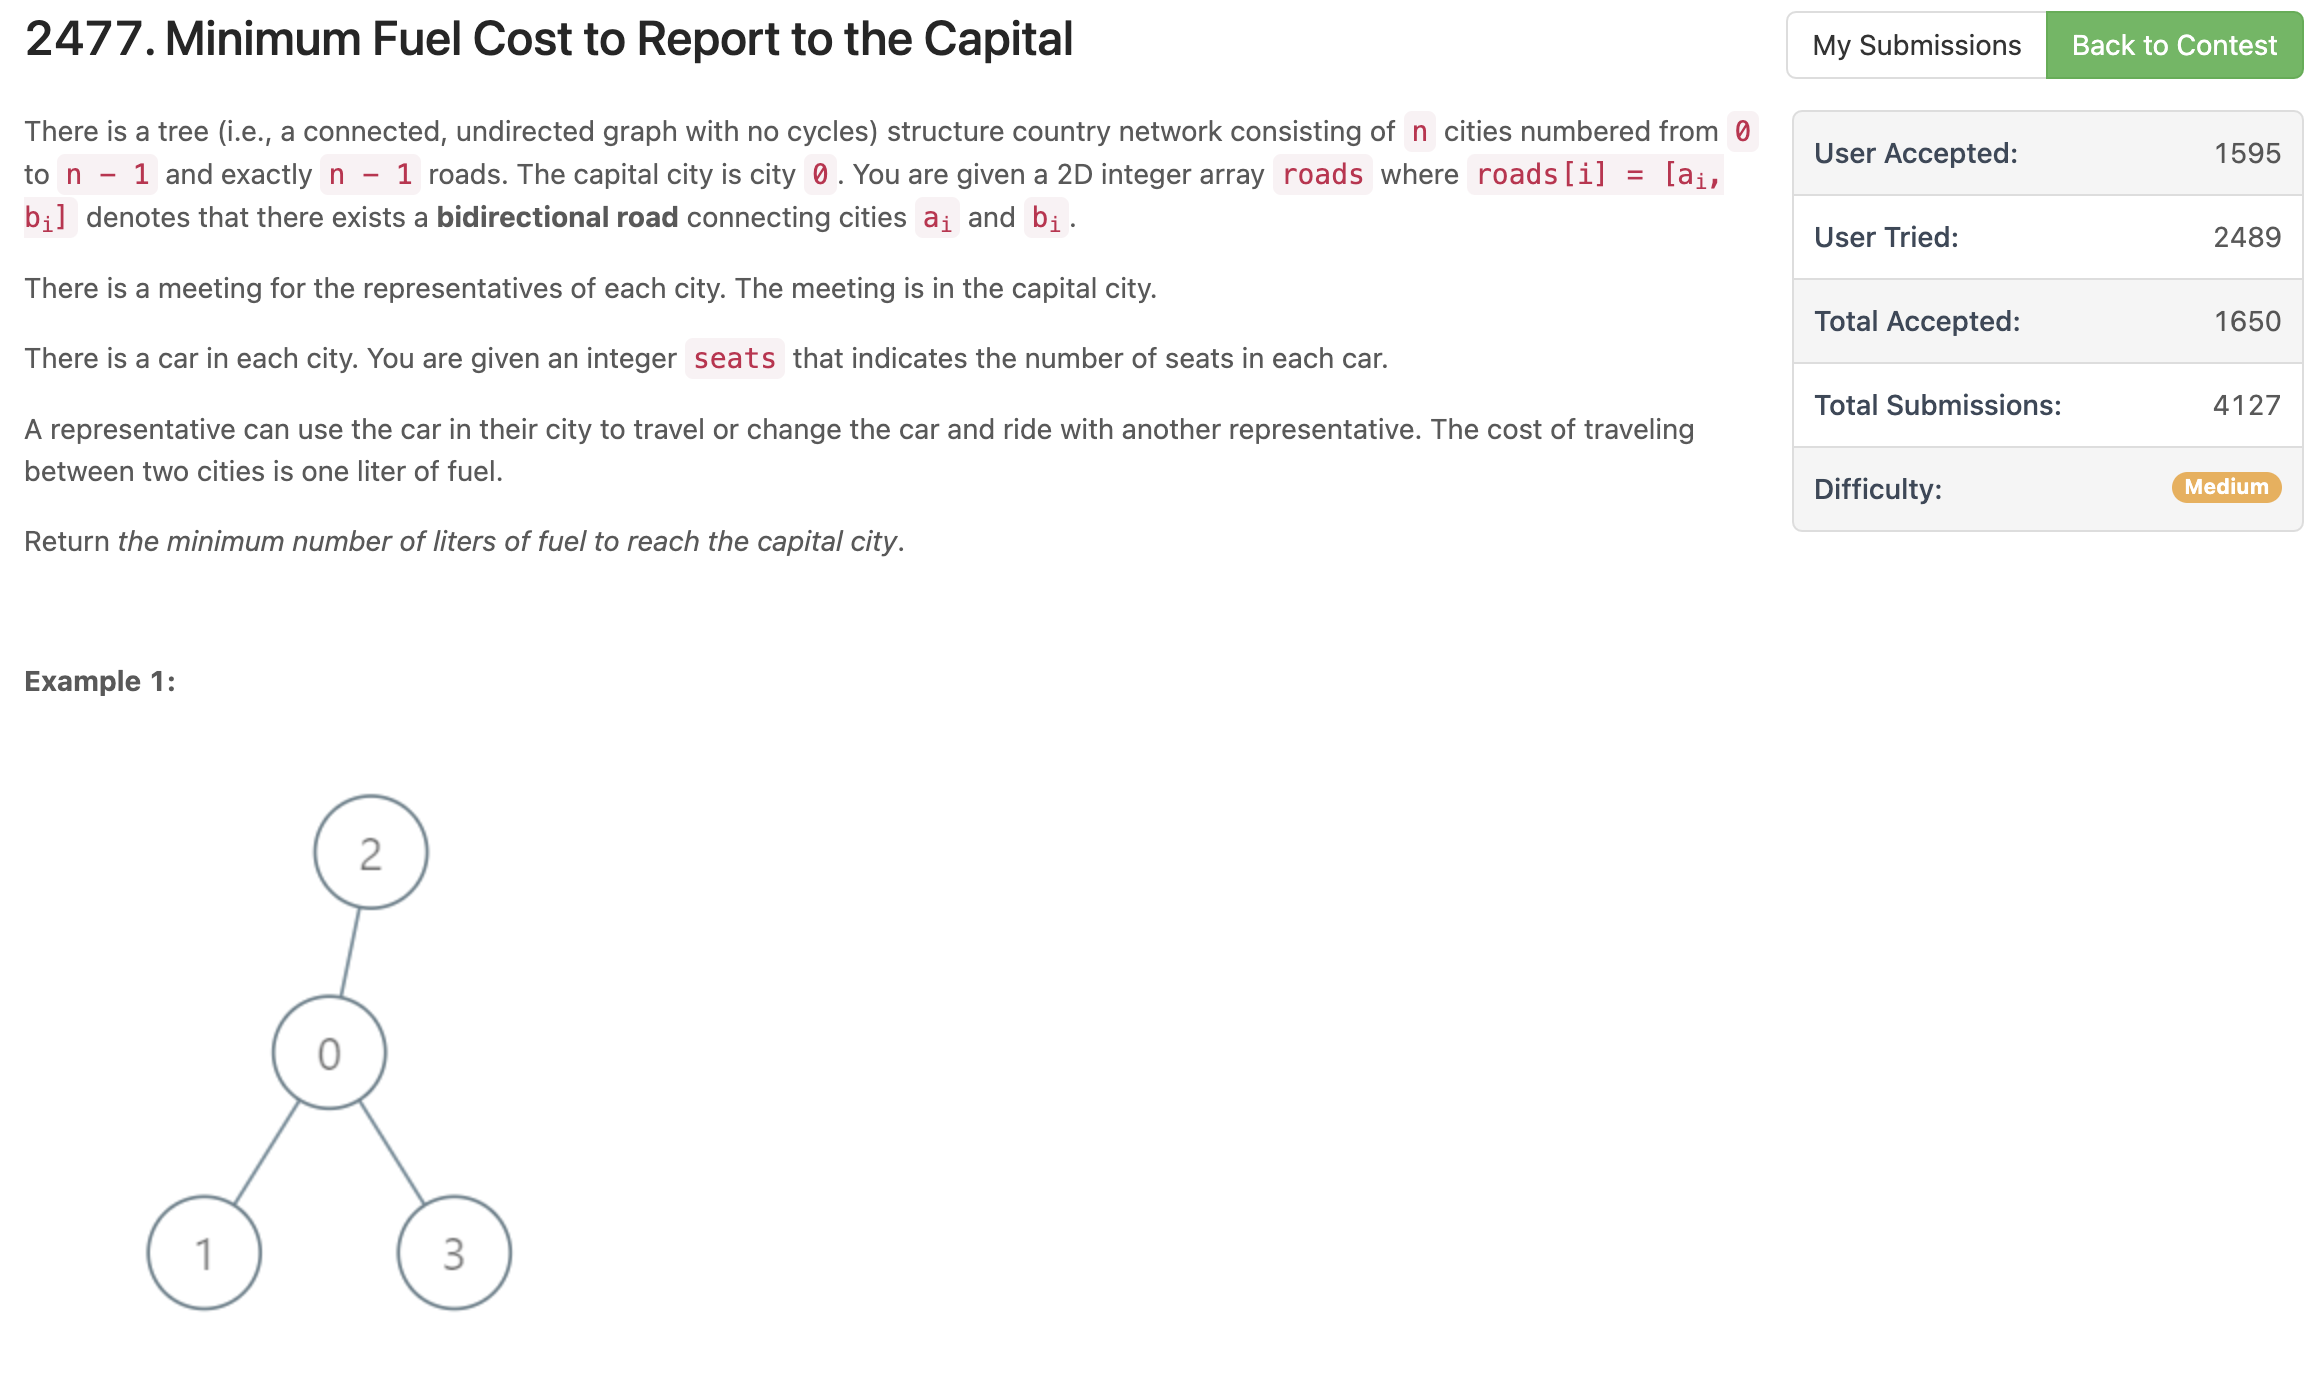
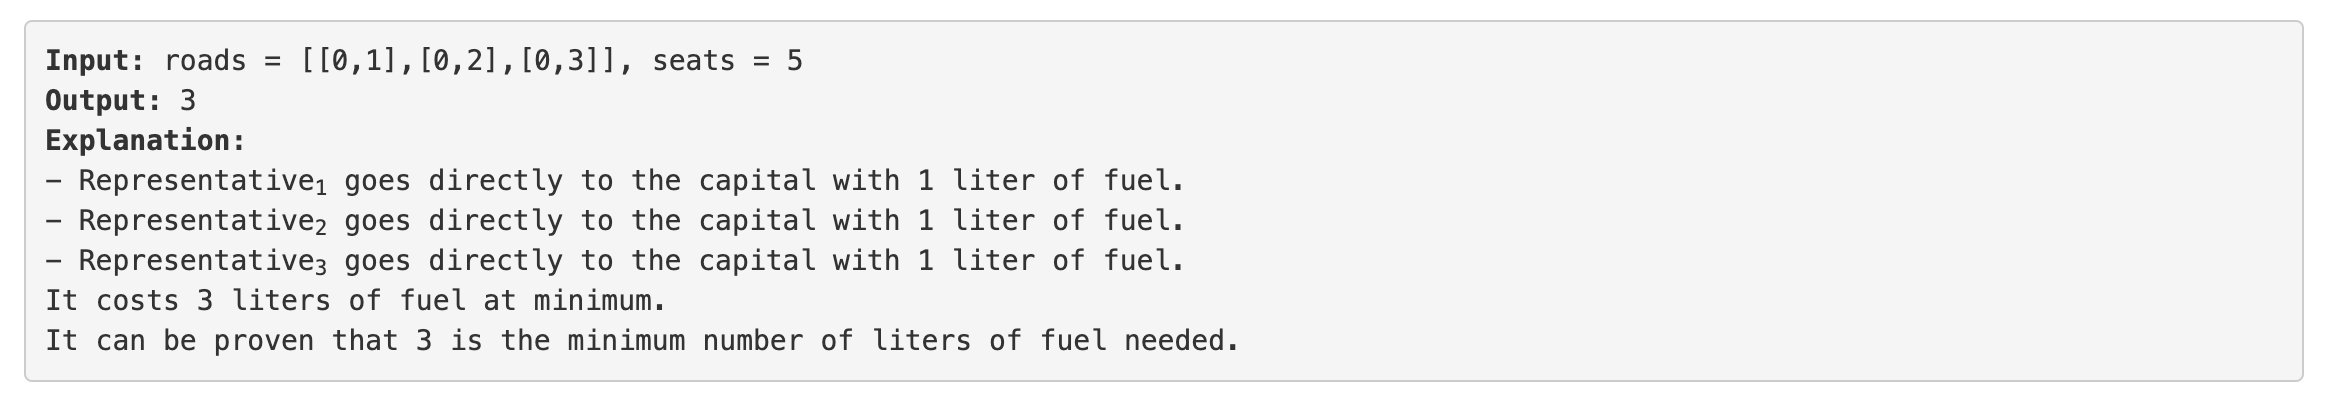
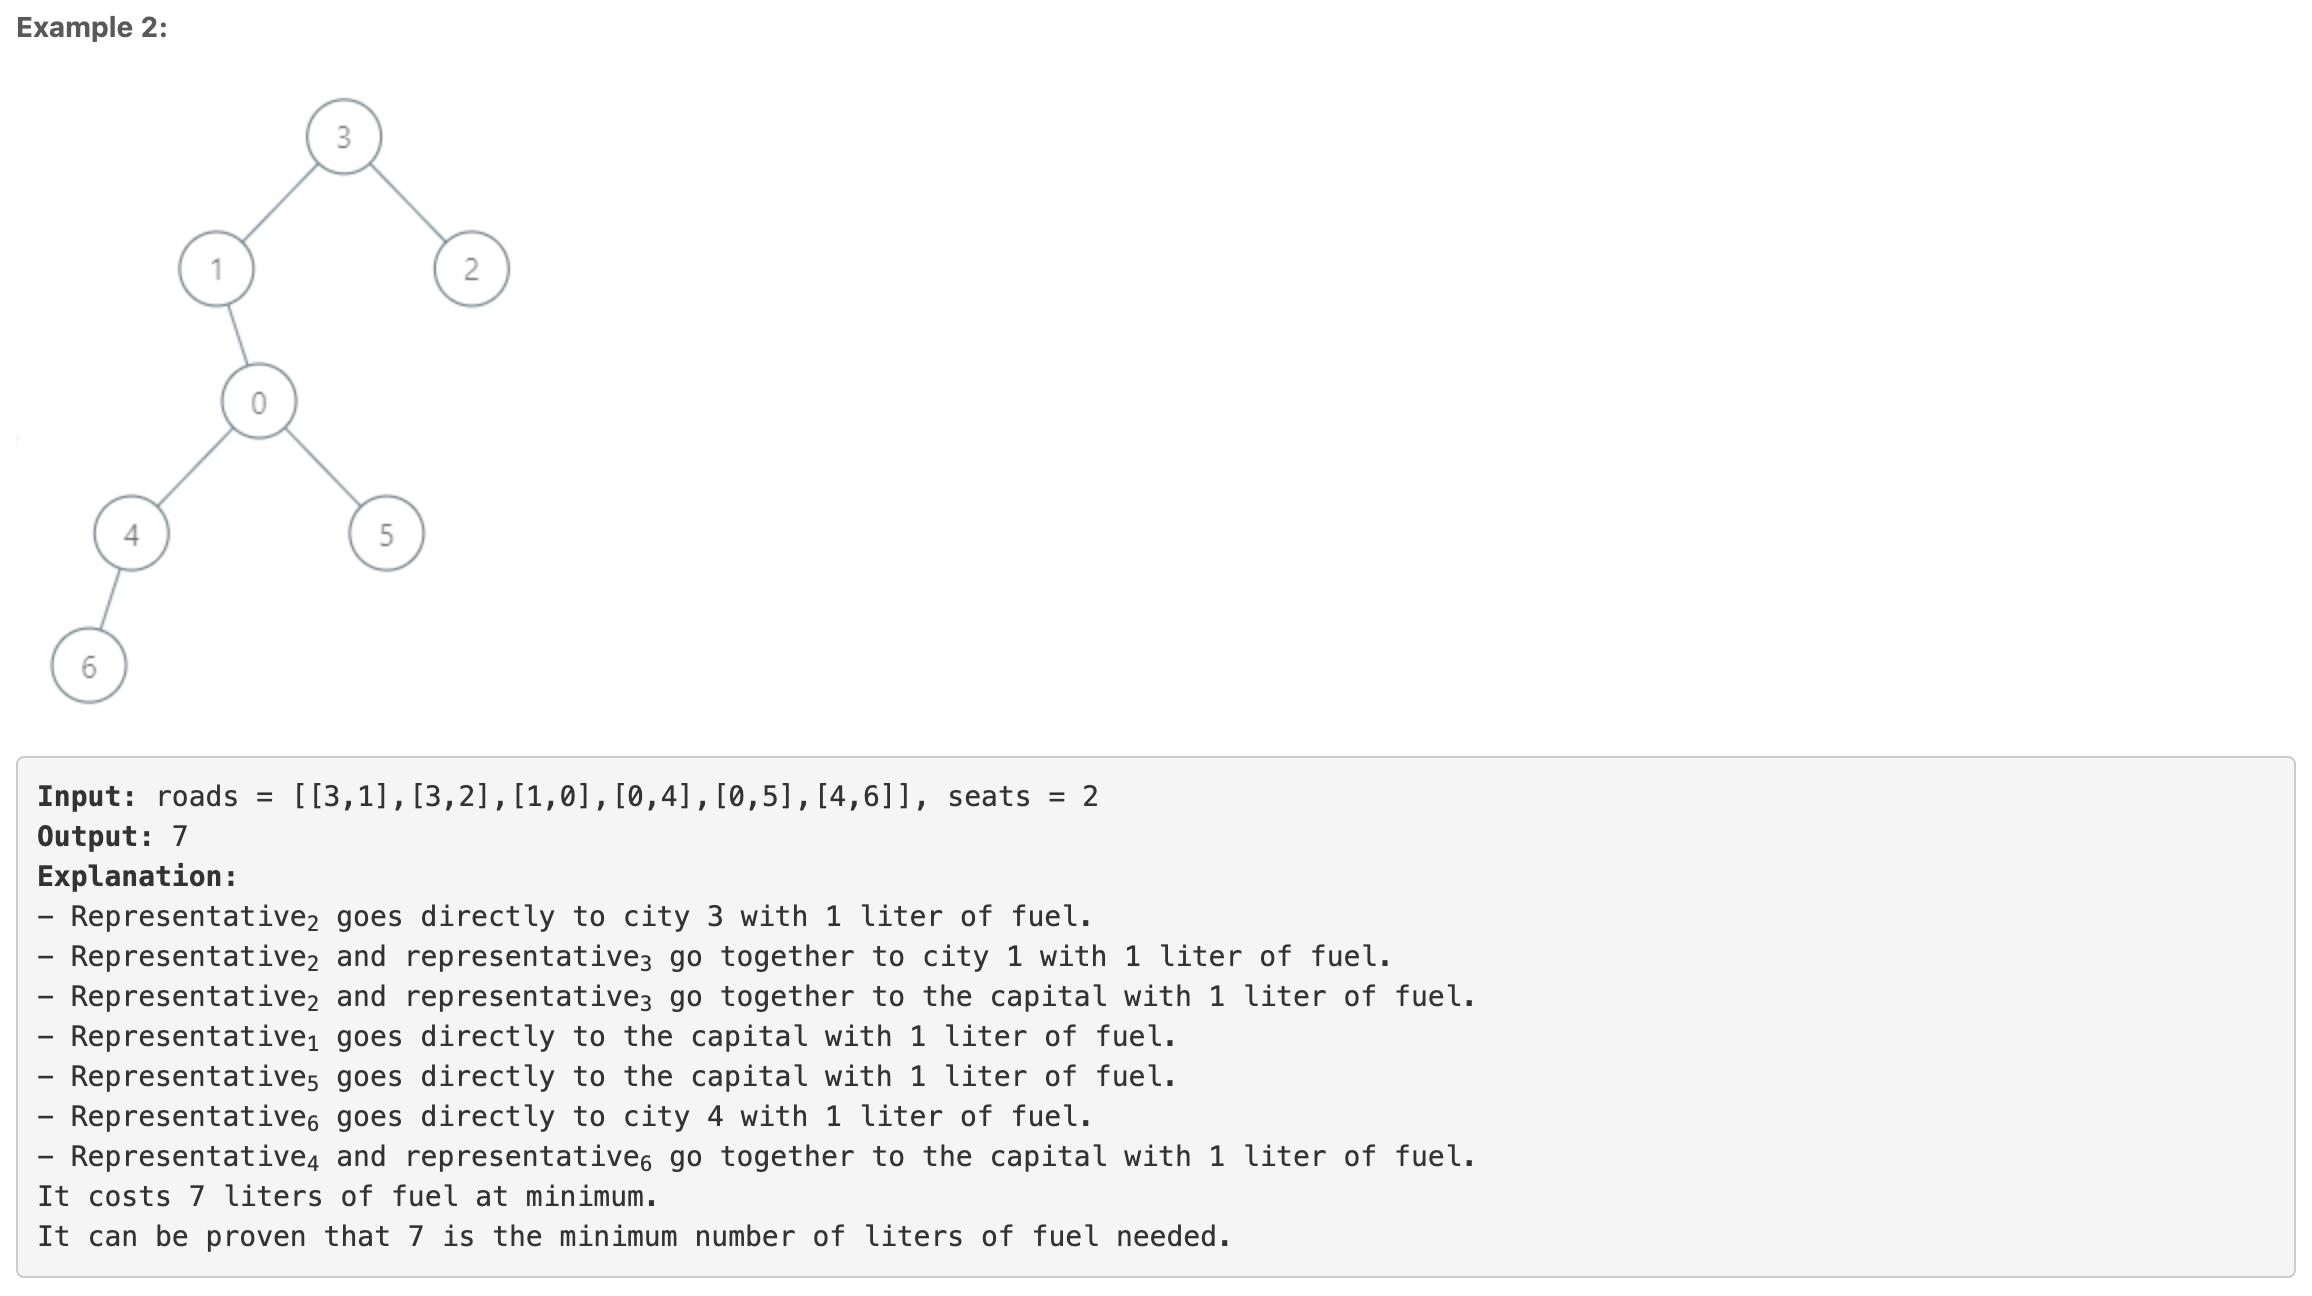
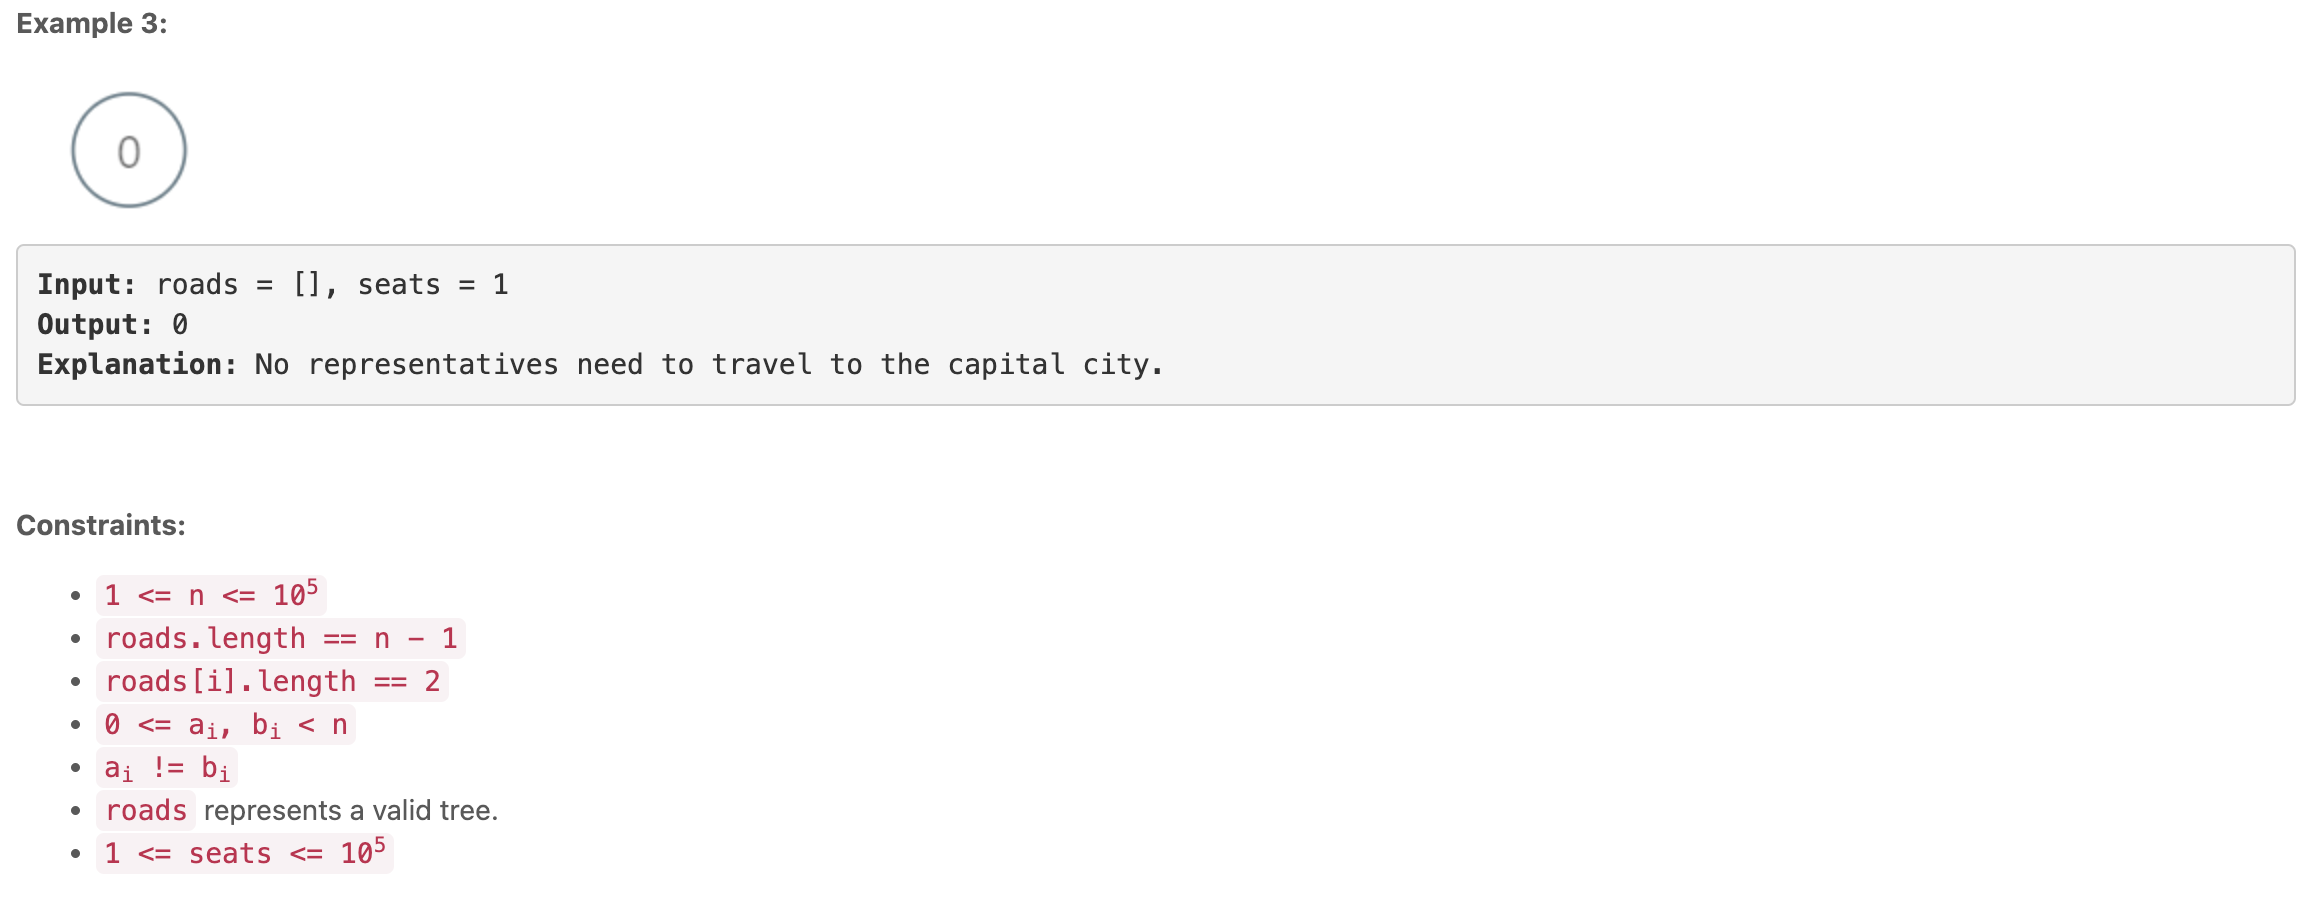

- 노드개수 - 1 = 간선개수 : dfs ?
- 나보다 (0기준으로)먼 사람이 몇명인지 확인하고, seats 수를 확인하여 태울 수 있는지 없는지(move together) 확인한다.

In [80]:
import math
from collections import defaultdict

class Solution:
    def minimumFuelCost(self, roads: list[list[int]], seats: int) -> int:
        graph = defaultdict(list)
        for a, b in roads:
            graph[a].append(b)
            graph[b].append(a)

        def dfs(u, p):
            cnt = 1
            for v in graph[u]:
                if v == p: continue # 이전 노드로는 다시 못돌아가게끔
                cnt += dfs(v, u)
            if u != 0:
                self.ans += math.ceil(cnt / seats)  # number of litters for `cnt` people to travel from node `u` to node `p`
            return cnt

        self.ans = 0
        dfs(0, -1)
        return self.ans